In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import boto3
from sagemaker import get_execution_role
import sagemaker
from sagemaker.predictor import csv_serializer, json_deserializer

# Load data

In [3]:
df_teste = pd.read_csv("s3://workshop-pucminas-wcdbda/datasets/validation/data.csv", header=None)

In [4]:
df_teste.shape

(85442, 31)

In [5]:
df_teste[0].value_counts()

0.0    85299
1.0      143
Name: 0, dtype: int64

In [6]:
X_test = df_teste.iloc[:,1:]
y_test_true = df_teste.iloc[:,0].values

# Pipeline Testes

In [12]:
def get_predictions(X_test, batch=100):
    predictions = []
    for test in np.array_split(X_test,batch):
        #break
        result = predictor.predict(test.values)
        result = result.decode("utf-8")
        result = result.split(',')
        #print (test.shape)
        predictions += [float(r) for r in result]
    return predictions

In [42]:
def metricas_classificacao(y_true, y_pred, classes, normalize=False, title="Matriz de confusão"):
    resultados = {'matriz confusão': confusion_matrix(y_true, y_pred),
                  'acurácia': round(accuracy_score(y_true, y_pred),4),
                  'f1 score': round(f1_score(y_true, y_pred),4),
                  'precision': round(precision_score(y_true, y_pred),4),
                  'recall': round(recall_score(y_true, y_pred),4),
                  'roc auc': round(roc_auc_score(y_true, y_pred),4)
                 }        
    return resultados

In [38]:
def plot_confusion_matrix(y_test_true, predictions):
    sns.heatmap(confusion_matrix(y_test_true, predictions),annot=True,cbar=False, cmap='Blues', fmt='g')
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.title("CONFUSSION MATRIX VISUALIZATION")
    plt.figure(figsize=(8,8))
    plt.show()

ENDPOINT  xgboost-data-default
Loading endpoint...
Predictions...
Metrics...


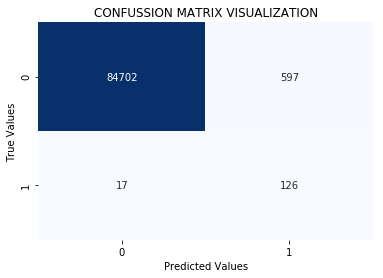

<Figure size 576x576 with 0 Axes>

ENDPOINT  xgboost-data-under
Loading endpoint...
Predictions...
Metrics...


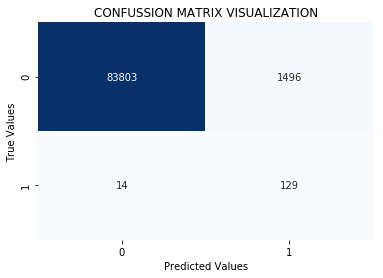

<Figure size 576x576 with 0 Axes>

ENDPOINT  xgboost-data-smote
Loading endpoint...
Predictions...
Metrics...


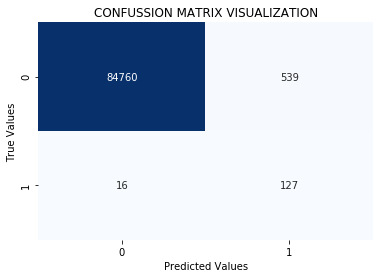

<Figure size 576x576 with 0 Axes>

In [43]:
endpoints_names = ["xgboost-data-default", "xgboost-data-under", "xgboost-data-smote"]
results = {}
for endpoint in endpoints_names:
    print("ENDPOINT ", endpoint)
    print("Loading endpoint...")
    predictor = sagemaker.predictor.RealTimePredictor(endpoint=endpoint)
    predictor.content_type = 'text/csv'
    predictor.serializer = csv_serializer
    predictor.deserializer = None
    print("Predictions...")
    predictions = get_predictions(X_test)
    print("Metrics...")
    resultados_metricas = metricas_classificacao(y_test_true, predictions, [0,1])
    
    results[endpoint] = {"predictions": predictions, "metricas":resultados_metricas}
    
    plot_confusion_matrix(y_test_true, predictions)

In [44]:
for model in results.keys():
    print(model)
    for m in results[model]["metricas"].keys():
        print(m, "=",results[model]["metricas"][m])
    print("-------------")

xgboost-data-default
matriz confusão = [[84702   597]
 [   17   126]]
acurácia = 0.9928
f1 score = 0.291
precision = 0.1743
recall = 0.8811
roc auc = 0.9371
-------------
xgboost-data-under
matriz confusão = [[83803  1496]
 [   14   129]]
acurácia = 0.9823
f1 score = 0.1459
precision = 0.0794
recall = 0.9021
roc auc = 0.9423
-------------
xgboost-data-smote
matriz confusão = [[84760   539]
 [   16   127]]
acurácia = 0.9935
f1 score = 0.314
precision = 0.1907
recall = 0.8881
roc auc = 0.9409
-------------
